<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 3 is all about exploring this data and modeling interesting relationships with regression.

Project 3 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [273]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
import pandas as pd
import patsy

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.cross_validation import cross_val_score, KFold, train_test_split

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [274]:

df = pd.read_csv('/Users/KerryChowChow/DSI-SF-3-kelly/datasets/san_francisco/food_inspections/food_inspections_LIVES_standard.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53428 entries, 0 to 53427
Data columns (total 17 columns):
business_id              53428 non-null int64
business_name            53428 non-null object
business_address         53424 non-null object
business_city            53428 non-null object
business_state           53428 non-null object
business_postal_code     52092 non-null object
business_latitude        37743 non-null float64
business_longitude       37743 non-null float64
business_location        37743 non-null object
business_phone_number    15406 non-null float64
inspection_id            53428 non-null object
inspection_date          53428 non-null object
inspection_score         40909 non-null float64
inspection_type          53428 non-null object
violation_id             40643 non-null object
violation_description    40642 non-null object
risk_category            40642 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 6.9+ MB


In [275]:
print df['inspection_date'].max()
print  df['inspection_date'].min()

12/31/2015 12:00:00 AM
01/02/2014 12:00:00 AM


In [276]:
legend = pd.read_csv('/Users/KerryChowChow/DSI-SF-3-kelly/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/code_legend.csv')
legend.head()


,Minimum_Score,Maximum_Score,Description
0,0,70,Poor
1,71,85,Needs Improvement
2,86,90,Adequate
3,91,100,Good


## The table above shows the 4 categories of the inspection score.

## the data is about the food inspections of SF restaurants from 01/02/2014 to 12/31/2015. Two years of inspection data

high risk category: records specific violations that directly relate to the transmission of food borne illnesses, the adulteration of food products and the contamination of food-contact surfaces.

moderate risk category: records specific violations that are of a moderate risk to the public health and safety.

low risk category: records violations that are low risk or have no immediate risk to the public health and safety.

In [401]:
df.head(8)
#you can tell that the risk_category doesn't fully reflect the inspection_score. 
#Some with Low Risk gets higher inspection_score than Moderate Risk

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140114,01/14/2014 12:00:00 AM,92.0,Routine - Unscheduled,10_20140114_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140114,01/14/2014 12:00:00 AM,92.0,Routine - Unscheduled,10_20140114_103145,Improper storage of equipment utensils or linens,Low Risk
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140114,01/14/2014 12:00:00 AM,92.0,Routine - Unscheduled,10_20140114_103154,Unclean or degraded floors walls or ceilings,Low Risk
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140729,07/29/2014 12:00:00 AM,94.0,Routine - Unscheduled,10_20140729_103144,Unapproved or unmaintained equipment or utensils,Low Risk
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140729,07/29/2014 12:00:00 AM,94.0,Routine - Unscheduled,10_20140729_103129,Insufficient hot water or running water,Moderate Risk
5,79782,Deli 23,2449 23rd St,San Francisco,CA,94110,NaN,NaN,NaN,NaN,79782_20160503,05/03/2016 12:00:00 AM,92.0,Routine - Unscheduled,79782_20160503_103120,Moderate risk food holding temperature,Moderate Risk
6,76437,Sweetheart Cafe,909 Grant Ave,San Francisco,CA,94108,NaN,NaN,NaN,NaN,76437_20160329,03/29/2016 12:00:00 AM,76.0,Routine - Unscheduled,76437_20160329_103113,Sewage or wastewater contamination,High Risk
7,5813,LICK MIDDLE SCHOOL,1220 Noe St,San Francisco,CA,94114,37.749490,-122.431750,"(37.74949, -122.43175)",1.415582e+10,5813_20140908,09/08/2014 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN


Hypothesis: The inspection score gets lower as the postal code number decreases or longitude decreases (towards the Western side of SF)

Data needed: inspection_score, business_longitude, postal code

*other random ideas: naming <> score (does a restaurant name contains 'Deli' gets worse score?), which time of the month or year gets more unschedule visit and/or bad ratings?

## Data Cleaning: there are some Nan valaues under important columns

In [55]:
df[df['inspection_score'].isnull()]['inspection_type'].unique()
#the most common inspection type is 'Routine - Unscheduled'. 
# the rows that don't have an inspection score tends to have types that are not 'Routine - Unscheduled'
#among those different types, 'Complaint' and 'Foodborne Illness Investigation' seemed worth visiting

array(['Structural Inspection', 'Reinspection/Followup',
       'New Construction', 'New Ownership', 'Complaint',
       'Routine - Scheduled', 'Foodborne Illness Investigation',
       'Non-inspection site visit', 'Routine - Unscheduled',
       'Complaint Reinspection/Followup', 'Special Event',
       'Multi-agency Investigation', 'Administrative or Document Review'], dtype=object)

In [57]:
df[df['inspection_type']=='Complaint']

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
130,67122,La Rondalla Restaurant & Bar,901 VALENCIA St,San Francisco,CA,94110,NaN,NaN,NaN,NaN,67122_20140506,05/06/2014 12:00:00 AM,NaN,Complaint,67122_20140506_103139,Improper food storage,Low Risk
156,69397,Minna SF Group LLC,142 Minna St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,69397_20131213,12/13/2013 12:00:00 AM,NaN,Complaint,69397_20131213_103148,No thermometers or uncalibrated thermometers,Low Risk
223,2898,The Cheesecake Factory,"251 Geary St, 8th Floor",San Francisco,CA,94102,37.787423,-122.407417,"(37.787423, -122.407417)",NaN,2898_20160413,04/13/2016 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN
361,7214,SUN FAT SEAFOOD,2687 MISSION St,San Francisco,CA,94110,37.754094,-122.418586,"(37.754094, -122.418586)",1.415529e+10,7214_20160115,01/15/2016 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN
498,62688,Auntie April's,4618 03rd St,San Francisco,CA,94124,37.736277,-122.390334,"(37.736277, -122.390334)",NaN,62688_20160303,03/03/2016 12:00:00 AM,NaN,Complaint,62688_20160303_103103,High risk food holding temperature,High Risk
519,78911,Samovar Tea Mission LLC,411 Valencia St,San Francisco,CA,94103,NaN,NaN,NaN,1.415562e+10,78911_20160520,05/20/2016 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN
523,1549,Cafe Bellini,235 Powell St,San Francisco,CA,94102,37.786974,-122.408174,"(37.786974, -122.408174)",NaN,1549_20160607,06/07/2016 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN
619,62688,Auntie April's,4618 03rd St,San Francisco,CA,94124,37.736277,-122.390334,"(37.736277, -122.390334)",NaN,62688_20160303,03/03/2016 12:00:00 AM,NaN,Complaint,62688_20160303_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
742,15535,Boudin Bakery & Cafe,160 Jefferson St 1st Floor,San Francisco,CA,94133,37.808352,-122.415157,"(37.808352, -122.415157)",NaN,15535_20160519,05/19/2016 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN
765,3911,BURGER KING,1690 VALENCIA St,San Francisco,CA,94110,37.745799,-122.420105,"(37.745799, -122.420105)",1.415525e+10,3911_20160329,03/29/2016 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN


In [60]:
df[df['inspection_type']=='Foodborne Illness Investigation']

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
402,81522,Pinecrest Diner,401 Geary St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,81522_20160329,03/29/2016 12:00:00 AM,NaN,Foodborne Illness Investigation,NaN,NaN,NaN
515,2862,Jasper's Corner Tap & Kitchen,401 Taylor St,San Francisco,CA,94102,37.786042,-122.411392,"(37.786042, -122.411392)",NaN,2862_20150717,07/17/2015 12:00:00 AM,NaN,Foodborne Illness Investigation,2862_20150717_103114,High risk vermin infestation,High Risk
524,2862,Jasper's Corner Tap & Kitchen,401 Taylor St,San Francisco,CA,94102,37.786042,-122.411392,"(37.786042, -122.411392)",NaN,2862_20150717,07/17/2015 12:00:00 AM,NaN,Foodborne Illness Investigation,2862_20150717_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
583,2862,Jasper's Corner Tap & Kitchen,401 Taylor St,San Francisco,CA,94102,37.786042,-122.411392,"(37.786042, -122.411392)",NaN,2862_20150717,07/17/2015 12:00:00 AM,NaN,Foodborne Illness Investigation,2862_20150717_103134,Other moderate risk violation,Moderate Risk
826,2862,Jasper's Corner Tap & Kitchen,401 Taylor St,San Francisco,CA,94102,37.786042,-122.411392,"(37.786042, -122.411392)",NaN,2862_20150717,07/17/2015 12:00:00 AM,NaN,Foodborne Illness Investigation,2862_20150717_103149,Wiping cloths not clean or properly stored or ...,Low Risk
1176,2862,Jasper's Corner Tap & Kitchen,401 Taylor St,San Francisco,CA,94102,37.786042,-122.411392,"(37.786042, -122.411392)",NaN,2862_20150717,07/17/2015 12:00:00 AM,NaN,Foodborne Illness Investigation,2862_20150717_103133,Foods not protected from contamination,Moderate Risk
4459,17763,Bar Tartine,561 VALENCIA St,San Francisco,CA,94110,37.763984,-122.421766,"(37.763984, -122.421766)",NaN,17763_20160610,06/10/2016 12:00:00 AM,NaN,Foodborne Illness Investigation,NaN,NaN,NaN
8034,75701,Gourment Noodle House,3751 Geary Blvd,San Francisco,CA,94118,NaN,NaN,NaN,1.415523e+10,75701_20160407,04/07/2016 12:00:00 AM,NaN,Foodborne Illness Investigation,NaN,NaN,NaN
10429,32887,Mission Beach Cafe,198 GUERRERO St,San Francisco,CA,94103,37.768035,-122.424480,"(37.768035, -122.42448)",NaN,32887_20150922,09/22/2015 12:00:00 AM,NaN,Foodborne Illness Investigation,NaN,NaN,NaN
11507,2054,Zarzuela,2000 Hyde St,San Francisco,CA,94109,37.799368,-122.419047,"(37.799368, -122.419047)",NaN,2054_20130802,08/02/2013 12:00:00 AM,NaN,Foodborne Illness Investigation,NaN,NaN,NaN


### It seems like it'd worth it to not drop the Nan values under 'inspection_score' column given that some are related to food-related- illness and they received a 'High Risk' rating. To not miss any dangerous restaurants, it's better to re-fill those with Nan investigation score.

#### Looking for the associated score for each category

In [83]:
df[df['risk_category']=='High Risk']['inspection_score'].describe()

count    5167.000000
mean       79.600348
std         9.167281
min        46.000000
25%              NaN
50%              NaN
75%              NaN
max       100.000000
Name: inspection_score, dtype: float64

In [76]:
df.iloc[53231, :]

business_id                                           65820
business_name                 McCauley's School (6th floor)
business_address                 450 Stanyan St @St. Mary's
business_city                                 San Francisco
business_state                                           CA
business_postal_code                                  94117
business_latitude                                   37.7737
business_longitude                                 -122.454
business_location                  (37.773657, -122.454417)
business_phone_number                                   NaN
inspection_id                                65820_20160407
inspection_date                      04/07/2016 12:00:00 AM
inspection_score                                         91
inspection_type                       Routine - Unscheduled
violation_id                          65820_20160407_103103
violation_description    High risk food holding temperature
risk_category                           

In [79]:
df[df['risk_category']=='Low Risk']['inspection_score'].describe()

count    19743.000000
mean        86.645191
std          8.538422
min         46.000000
25%               NaN
50%               NaN
75%               NaN
max        100.000000
Name: inspection_score, dtype: float64

In [80]:
df[df['risk_category']=='Moderate Risk']['inspection_score'].describe()

count    13041.000000
mean        85.041408
std          8.553018
min         46.000000
25%               NaN
50%               NaN
75%               NaN
max        100.000000
Name: inspection_score, dtype: float64

It seems strange that some restaurants under High Risks still have an inspection_score of 90 or higher. For example, for McCauley's School (6th floor) it got a 91 score while getting a High Risk category. It makes me doubt the reliability of the inpspection score. From the SF Department of Public Health webiste, https://www.sfdph.org/dph/EH/Food/Score/, it described that score with 90 or higher may contain High Risk violations.

In [95]:
df[(df['violation_description']=='High risk food holding temperature')]['risk_category'].unique()
#checking to see if violation description is reliable to understand its risk_category. The result seems promising.

array(['High Risk'], dtype=object)

In [113]:
df[(df['inspection_score']>=90) & (df['risk_category']=='High Risk')].business_id.count()
#there are 658 restaurants that are under High Risk but received a score that's 90 or higher
                                                                                                    

658

In [115]:
df[(df['inspection_score']>=90) & (df['risk_category']=='High Risk')]['violation_description'].unique()

array(['Sewage or wastewater contamination', 'Improper cooling methods',
       'High risk vermin infestation',
       'Unclean or unsanitary food contact surfaces',
       'High risk food holding temperature',
       'Unclean hands or improper use of gloves',
       'Improper reheating of food', 'No hot water or running water',
       'Contaminated or adulterated food', 'Other high risk violation',
       'Unapproved food source',
       'Unauthorized or unsafe use of time as a public health control measure',
       'Mobile food facility not operating with an approved commissary',
       'Unreported or unrestricted ill employee with communicable disease',
       'Improper cooking time or temperatures',
       'Mobile food facility with unapproved operating conditions',
       'Prohibited food served to sensitive population'], dtype=object)

#injecting a bias of making all High Risk restaurants have inspection_scores that are lower than the average

In [111]:
df['inspection_score'].mean()

86.18362707472683

In [112]:
df['inspection_score'].std()

9.408229341605532

to remove the inspection_score and risk_categories confusion. I'm going to reassign all rows with over 90 scores and under High Risk with a random number between 47 and 70 (47 is the lowest score in this dataset). Reassign all rows with under 70 scores but a Low Risk category a random number between 90 and 100. For those that are under Moderate Risk but are either lower than 70 or higher than 90 will be assign a random number between 70 and 90.

So all Low Risk should be 90 or high, Moderate Risk should be between 70 and 89, and all High Risk should be 46 ~ 69 (it's also roughly based on the legend dataset) 

In [122]:
df[(df['inspection_score']>=90) & (df['risk_category']=='Low Risk')].business_id.count()

9383

In [141]:
df[(df['inspection_score']<=70) & (df['risk_category']=='Low Risk')].business_id.count()

1105

In [142]:
df.columns

Index([u'business_id', u'business_name', u'business_address', u'business_city',
       u'business_state', u'business_postal_code', u'business_latitude',
       u'business_longitude', u'business_location', u'business_phone_number',
       u'inspection_id', u'inspection_date', u'inspection_score',
       u'inspection_type', u'violation_id', u'violation_description',
       u'risk_category'],
      dtype='object')

In [277]:
focus_df = df[['business_id', 'business_name', 'business_postal_code', 'business_latitude', 'business_longitude', 'inspection_score','inspection_type','violation_description','risk_category' ]]

focus_df['new_score']=0

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [280]:
#reassign all rows with over 90 scores and under High Risk with a random number between 47 and 70
high_mask= (focus_df['inspection_score']>=90) & (focus_df['risk_category']=='High Risk')
focus_df[high_mask]['new_score'] = focus_df[high_mask]['new_score'].map(lambda x: np.random.randint(46,70))


#looking for Moderate Risk with score 90 or higher
#mod_high_mask = (focus_df['inspection_score']>=90) & (focus_df['risk_category']=='Moderate Risk')
#focus_df[mod_high_mask]['new_score'] = focus_df[mod_high_mask]['inspection_score'].apply(lambda x: np.random.randint(71,89))

#looking for High Risk with score between 71 and 89
high_mod_mask = (focus_df['inspection_score']<=89) & (focus_df['inspection_score']>=71) & (focus_df['risk_category']=='High Risk')
focus_df[high_mod_mask]['new_score'] = focus_df[high_mod_mask]['new_score'].map(lambda x: np.random.randint(46,70))



/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [281]:
focus_df[focus_df['risk_category']=='High Risk']

,business_id,business_name,business_postal_code,business_latitude,business_longitude,inspection_score,inspection_type,violation_description,risk_category,new_score
6,76437,Sweetheart Cafe,94108,NaN,NaN,76.0,Routine - Unscheduled,Sewage or wastewater contamination,High Risk,68.0
22,5813,LICK MIDDLE SCHOOL,94114,37.749490,-122.431750,93.0,Routine - Unscheduled,Sewage or wastewater contamination,High Risk,NaN
31,66999,Super Duper Burgers,94123,37.800344,-122.439697,87.0,Routine - Unscheduled,Unclean hands or improper use of gloves,High Risk,51.0
43,37633,100% Dessert Cafe,94121,37.781988,-122.486252,72.0,Routine - Unscheduled,High risk vermin infestation,High Risk,57.0
70,26340,VIP Coffee & Cake Shop,94133,37.797704,-122.408058,72.0,Routine - Unscheduled,High risk vermin infestation,High Risk,50.0
83,75259,The Battery - Prep Kitchen,94111,NaN,NaN,91.0,Routine - Unscheduled,Improper cooling methods,High Risk,NaN
87,180,NENAS RESTAURANT,94110,37.741460,-122.422484,91.0,Routine - Unscheduled,High risk vermin infestation,High Risk,NaN
90,1977,BURMA SUPERSTAR RESTAURANT,94118,37.783004,-122.462539,87.0,Routine - Unscheduled,Improper cooling methods,High Risk,49.0
91,77564,New Cheung Hing Restaurant LLC.,94122,NaN,NaN,73.0,Routine - Unscheduled,Unclean or unsanitary food contact surfaces,High Risk,53.0
102,76615,Top's Cafe,94134,NaN,NaN,57.0,Routine - Unscheduled,High risk vermin infestation,High Risk,NaN


#Since there are more than one visit per restaurant and I'm only looking at their scores related to their geo location. I'm going to condense repeated business_id to a single row with inspectin_score being averaged. 

In [282]:
focus_df = focus_df.drop('new_score', axis= 1)

In [283]:
mask2 = (focus_df['inspection_score'].isnull()) & (focus_df['risk_category']=='High Risk')
# focus_df[ mask2 ].inspection_score.apply(lambda x: np.random.randint(46,70))
subset = focus_df[mask2]
subset.inspection_score = subset.inspection_score.map(lambda x: np.random.randint(46,70))

#apply is for all dataframe. map is for one column


In [285]:
focus_df[mask2] = subset
focus_df.iloc[515, :]


business_id                                         2862
business_name              Jasper's Corner Tap & Kitchen
business_postal_code                               94102
business_latitude                                 37.786
business_longitude                              -122.411
inspection_score                                      55
inspection_type          Foodborne Illness Investigation
violation_description       High risk vermin infestation
risk_category                                  High Risk
Name: 515, dtype: object

In [291]:
mask3 = (focus_df['inspection_score'].isnull()) & (focus_df['risk_category']=='Moderate Risk')
subset3 = focus_df[mask3]
subset3.inspection_score = subset3.inspection_score.map(lambda x: np.random.randint(71,89))
focus_df[mask3] = subset3


In [292]:
mask4 = (focus_df['inspection_score'].isnull()) & (focus_df['risk_category']=='Low Risk')
subset4 = focus_df[mask4]
subset4.inspection_score = subset4.inspection_score.map(lambda x: np.random.randint(46,70))
focus_df[mask4] = subset4


In [305]:
focus_df[focus_df['inspection_score'].isnull()]['inspection_type'].unique()


array(['Reinspection/Followup', 'New Construction', 'New Ownership',
       'Complaint', 'Structural Inspection',
       'Foodborne Illness Investigation', 'Non-inspection site visit',
       'Routine - Unscheduled', 'Complaint Reinspection/Followup',
       'Routine - Scheduled', 'Special Event',
       'Multi-agency Investigation', 'Administrative or Document Review'], dtype=object)

In [316]:
focus_df[(focus_df['inspection_score'].isnull()) & (focus_df['inspection_type']=='Foodborne Illness Investigation')]['risk_category'].unique()
# 46 rows that are under Foodborne Illness Investigation and don't have an inspection score or a risk category
# assuming that those are false alarms, so will drop them as well

array([nan], dtype=object)

In [314]:
focus_df[(focus_df['inspection_score'].isnull()) & (focus_df['inspection_type']=='Complaint')]['risk_category'].unique()
# over 1000 restaurants got inspections because of compaints and they didn't receive a score or a risk category. 
# so I'm going to assume that those are false alarms and drop those rows

array([nan], dtype=object)

In [393]:
# focus_df['inspection_score'].dropna(axis=0, how='any', inplace=True)
focus_df.dropna(subset=['inspection_score'],axis=0, inplace = True)
focus_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43600 entries, 0 to 53427
Data columns (total 9 columns):
business_id              43600 non-null int64
business_name            43600 non-null object
business_postal_code     42549 non-null object
business_latitude        32450 non-null float64
business_longitude       32450 non-null float64
inspection_score         43600 non-null float64
inspection_type          43600 non-null object
violation_description    40642 non-null object
risk_category            40642 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 3.3+ MB


In [397]:
#dropping rows when they have more than 4 missing values
focus_df.dropna(thresh=4, axis=0, inplace=True)
#focus_df.dropna(subset=['inspection_score'],axis=0, inplace = True)

Grouping all rows with the same business_id and return an average of their inspection_score

In [400]:
pd.DataFrame(focus_df.groupby(['business_id'])['inspection_score'].mean())

,inspection_score
business_id,
10,87.400000
19,94.250000
24,96.666667
31,99.000000
45,84.470588
48,91.555556
50,84.444444
54,95.000000
56,92.750000


In [412]:
new_df = focus_df.groupby('business_id').inspection_score.mean().reset_index()


In [416]:
clean_df = new_df.merge(focus_df, on='business_id', how = 'inner')


In [420]:
clean_df.drop_duplicates(subset = ['business_id'], keep= 'first', inplace=True)

In [421]:
clean_df.head()

,business_id,inspection_score_x,business_name,business_postal_code,business_latitude,business_longitude,inspection_score_y,inspection_type,violation_description,risk_category
0,10,87.400000,Tiramisu Kitchen,94104,37.791116,-122.403816,92.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk
10,19,94.250000,Nrgize Lifestyle Cafe,94109,37.786848,-122.421547,94.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk
18,24,96.666667,OMNI S.F. Hotel - 2nd Floor Pantry,94104,37.792888,-122.403135,96.0,Routine - Unscheduled,Improper storage of equipment utensils or linens,Low Risk
24,31,99.000000,Norman's Ice Cream and Freezes,94133,37.807155,-122.419004,98.0,Routine - Unscheduled,Food safety certificate or food handler card n...,Low Risk
26,45,84.470588,CHARLIE'S DELI CAFE,94110,37.747114,-122.413641,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk


## specifically create a new DF that has no missing values in longitude

In [423]:
df_geo = clean_df.dropna(subset = ['business_latitude', 'business_longitude'], axis=0, inplace = False)

In [425]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3612 entries, 0 to 35270
Data columns (total 10 columns):
business_id              3612 non-null int64
inspection_score_x       3612 non-null float64
business_name            3612 non-null object
business_postal_code     3543 non-null object
business_latitude        3612 non-null float64
business_longitude       3612 non-null float64
inspection_score_y       3612 non-null float64
inspection_type          3612 non-null object
violation_description    3177 non-null object
risk_category            3177 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 310.4+ KB


## Clean Postal-code to int then get rid of missing or incorrect values

In [426]:
df_geo['business_postal_code'].unique()

array(['94104', '94109', '94133', '94110', '94122', '94103', '94115',
       '94131', '94111', '94117', '94107', '94108', '94102', '94132',
       '94105', '94134', '94124', '94116', '94121', '94118', '94112',
       '94127', '94123', '94114', '94513', nan, '94158', '95105', '94140',
       '94013', '94130', 'CA', '92672', '94120', '94143', '94609', '94101',
       '00000'], dtype=object)

In [436]:
#Ideally I can first try to find the missing postal code by grouping their longitude. Based on time-constraint, I'm going 
# to drop those 69 rows with postal_code missing values
#also dropping those with longitude missing
df_geo.dropna(subset = ['business_longitude', 'business_postal_code'], axis =0 , inplace = True)



/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [467]:
#turn postal code to int
df_geo = df_geo[~df_geo['business_postal_code'].map(len) != 5]


In [647]:
df_geo.columns

Index([u'business_id', u'inspection_score_x', u'business_name',
       u'business_postal_code', u'business_latitude', u'business_longitude',
       u'inspection_score_y', u'inspection_type', u'violation_description',
       u'risk_category'],
      dtype='object')

In [676]:
from string import lower
df_geo['business_name'] = df_geo['business_name'].apply(lower)
#turning all name to lower case

# Categorizing restuarants

Create categories: cuisine/ restaurant/ bistro/kitchen as 1, deli/market/supermarket/stop as 2, school as 3, hotel/inn as 4, sushi/seafood/japan as 5, cafe/coffee/caffee as 6, bar/grill/lounge/pub/brewery as 7, pizza/pizzeria as 8, bakery/cake/bakeries as 9, others as 10

In [692]:
df_geo.shape

(3532, 10)

In [700]:
df_geo = df_geo.reset_index()


In [702]:
df_geo.drop('index', axis =1, inplace = True)
    

In [770]:
def categorize(cat):
    cat = str(cat)
    if 'cuisine' in cat or 'kitchen' in cat or 'bistro' in cat or 'restaurant' in cat: return 1
    elif 'deli' in cat or 'market' in cat or 'supermarket' in cat or 'stop' in cat: return 2
    elif 'school' in cat : return 3
    elif 'hotel' in cat or 'inn' in cat : return 4
    elif 'sushi' in cat or 'seafood' in cat or 'japan' in cat : return 5
    elif 'cafe' in cat or 'coffee' in cat or 'caffee' is cat : return 6
    elif 'bar' in cat or 'grill' in cat or 'lounge' in cat or 'pub' in cat or 'brewery' in cat : return 7
    elif 'pizza' is cat or 'pizzeria' in cat : return 8
    elif 'bakery' in cat or 'cake' in cat or 'bakeries' in cat: return 9
    else: return 10

df_geo['business_category'] = df_geo['business_name'].map(categorize)

In [765]:
df_geo[df_geo['business_name'].str.contains('cuisine|kitchen|bistro|restaurant')].count()

business_id              449
inspection_score_x       449
business_name            449
business_postal_code     449
business_latitude        449
business_longitude       449
inspection_score_y       449
inspection_type          449
violation_description    420
risk_category            420
dtype: int64

In [767]:
'rthrthetgeg'.re.search('b')

AttributeError: 'str' object has no attribute 're'

In [750]:
print df_geo[df_geo['business_name'].str.contains('cafe')].count()
print df_geo[df_geo['business_name'].str.contains('restaurant')].count()
print df_geo[df_geo['business_name'].str.contains('bar')].count()

business_id              326
inspection_score_x       326
business_name            326
business_postal_code     326
business_latitude        326
business_longitude       326
inspection_score_y       326
inspection_type          326
violation_description    300
risk_category            300
dtype: int64
business_id              335
inspection_score_x       335
business_name            335
business_postal_code     335
business_latitude        335
business_longitude       335
inspection_score_y       335
inspection_type          335
violation_description    319
risk_category            319
dtype: int64
business_id              115
inspection_score_x       115
business_name            115
business_postal_code     115
business_latitude        115
business_longitude       115
inspection_score_y       115
inspection_type          115
violation_description    103
risk_category            103
dtype: int64


In [492]:
df_geo[df_geo['business_postal_code'].map(len) != 5]


,business_id,inspection_score_x,business_name,business_postal_code,business_latitude,business_longitude,inspection_score_y,inspection_type,violation_description,risk_category
2916,64540,91.0,Leo's Hot Dogs,CA,37.760054,-122.419166,91.0,Routine - Unscheduled,Food safety certificate or food handler card n...,Low Risk
2927,64738,78.0,Japacurry,CA,37.777122,-122.419639,89.0,Routine - Unscheduled,Moderate risk food holding temperature,Moderate Risk


In [488]:

df_geo = df_geo.reset_index()


In [490]:
df_geo = df_geo.drop('index', axis=1)

In [517]:
#dropping 2916 and 2927
df_geo = df_geo.drop(df_geo.index[[2916,2927]])

In [532]:
df_geo.drop(2927, axis=0, inplace = True)

In [533]:
df_geo[df_geo['business_postal_code'].map(len) != 5]

,business_id,inspection_score_x,business_name,business_postal_code,business_latitude,business_longitude,inspection_score_y,inspection_type,violation_description,risk_category


In [538]:
df_geo.business_postal_code = df_geo.business_postal_code.map(float)

In [774]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 11 columns):
business_id              3532 non-null int64
inspection_score_x       3532 non-null float64
business_name            3532 non-null object
business_postal_code     3532 non-null float64
business_latitude        3532 non-null float64
business_longitude       3532 non-null float64
inspection_score_y       3532 non-null float64
inspection_type          3532 non-null object
violation_description    3114 non-null object
risk_category            3114 non-null object
business_category        3532 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 303.6+ KB


In [780]:
score_geo = df_geo[['inspection_score_x','business_postal_code', 'business_latitude', 'business_longitude', 'business_category']]
#making a separate dataframe with useful columns
score_geo.tail()

#it looks beautiful now!!!

,inspection_score_x,business_postal_code,business_latitude,business_longitude,business_category
3527,98.000000,94114.0,37.761113,-122.430789,6
3528,98.666667,94104.0,37.792237,-122.400124,10
3529,96.000000,94123.0,37.798078,-122.435444,10
3530,84.230769,94127.0,37.731568,-122.450970,10
3531,90.400000,94111.0,37.794063,-122.400726,1


In [781]:
score_geo_dummy = pd.get_dummies(score_geo, columns = ['business_category'])
#dummified the categorical values to 10 columns of dummies

In [782]:
score_geo_dummy.head()

,inspection_score_x,business_postal_code,business_latitude,business_longitude,business_category_1,business_category_2,business_category_3,business_category_4,business_category_5,business_category_6,business_category_7,business_category_8,business_category_9,business_category_10
0,87.400000,94104.0,37.791116,-122.403816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94.250000,94109.0,37.786848,-122.421547,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,96.666667,94104.0,37.792888,-122.403135,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,99.000000,94133.0,37.807155,-122.419004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,84.470588,94110.0,37.747114,-122.413641,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Some Visualization

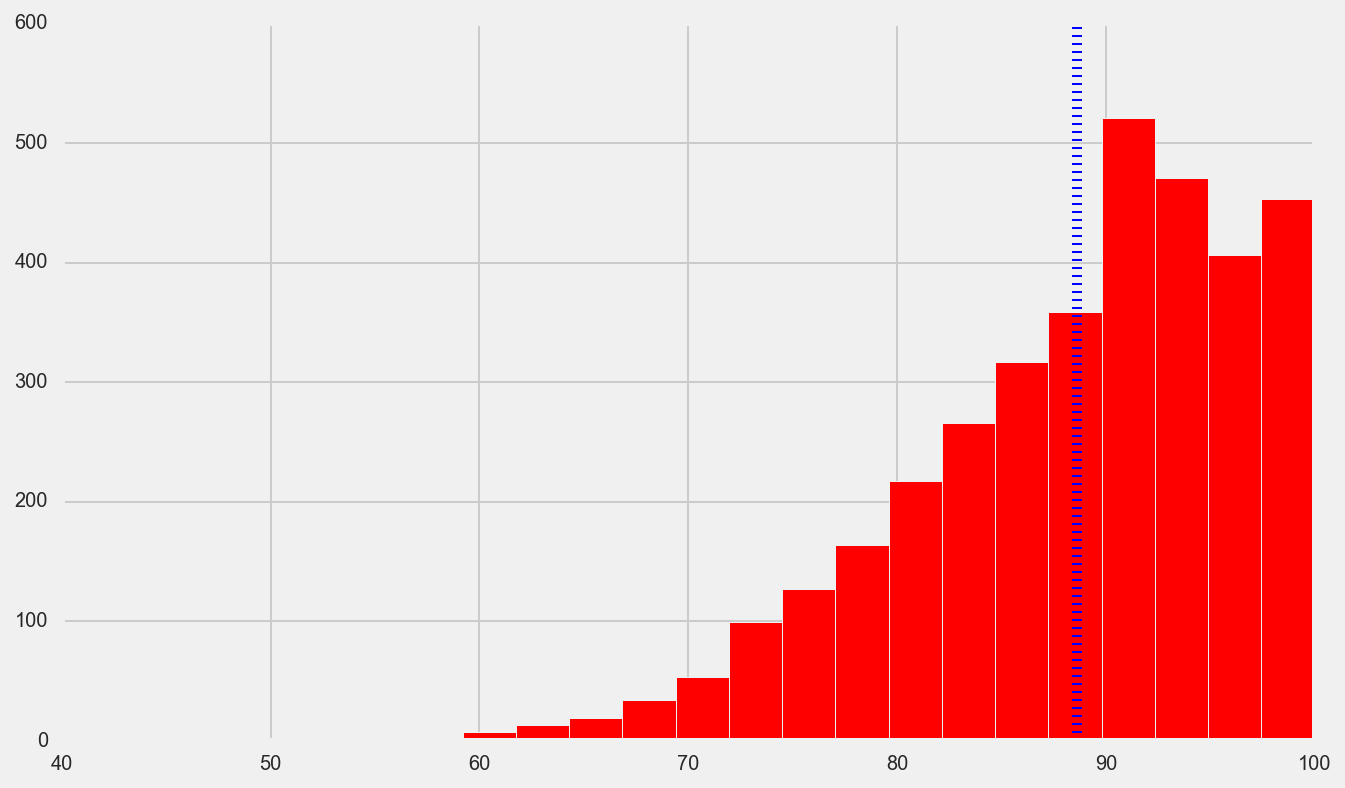

In [543]:
fig = plt.figure(figsize=(10,6))
result = plt.hist(score_geo['inspection_score_x'], bins=20, color='r')
plt.axvline(score_geo['inspection_score_x'].mean(), color='b', linestyle='dotted', linewidth=5)

#the scores are really skewed/

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


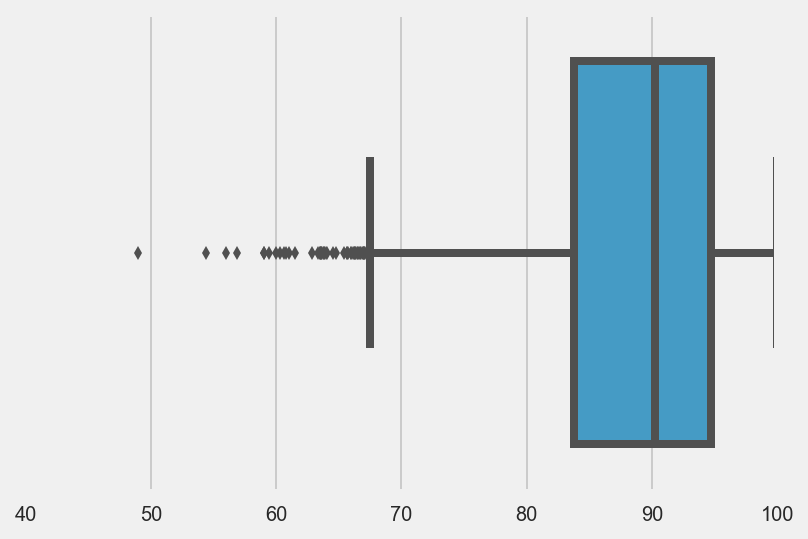

In [556]:
sns.boxplot(target1)


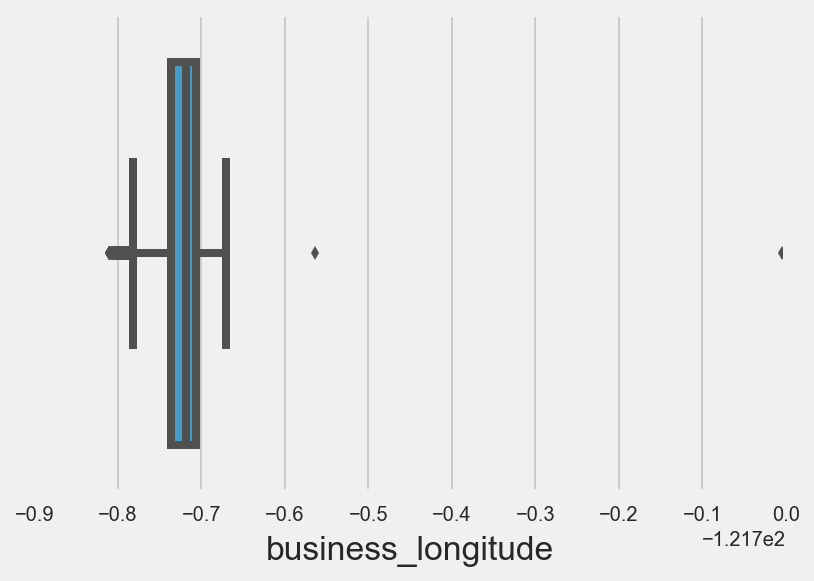

In [587]:
sns.boxplot(score_geo['business_longitude'])

In [784]:
score_geo[score_geo['business_longitude'] > - 0.6 - 121.7] 
                                             

,inspection_score_x,business_postal_code,business_latitude,business_longitude,business_category
1054,100.000000,94513.0,37.875937,-121.704034,1
3005,86.222222,94609.0,37.834628,-122.264171,10


In [785]:
score_geo.drop([1054, 3016], axis=0, inplace=True)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


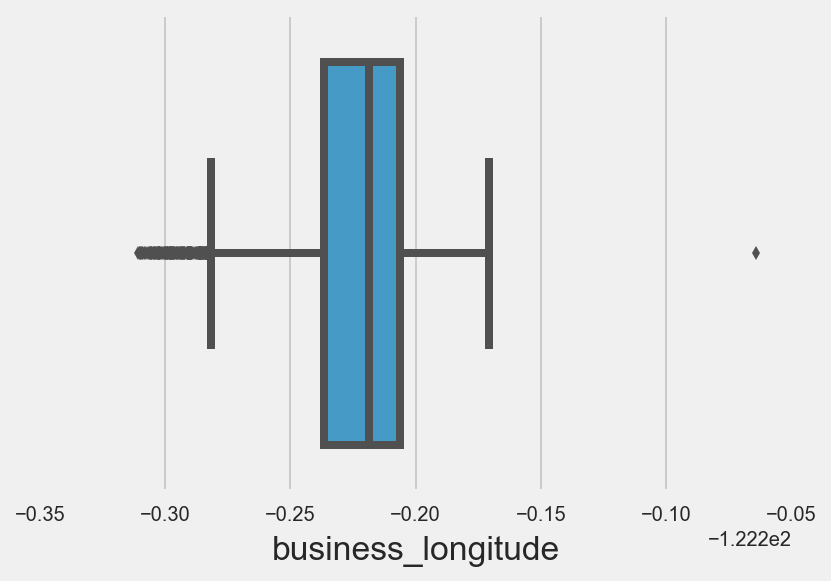

In [786]:
sns.boxplot(score_geo['business_longitude'])
#the new boxplot after trying remove outliers

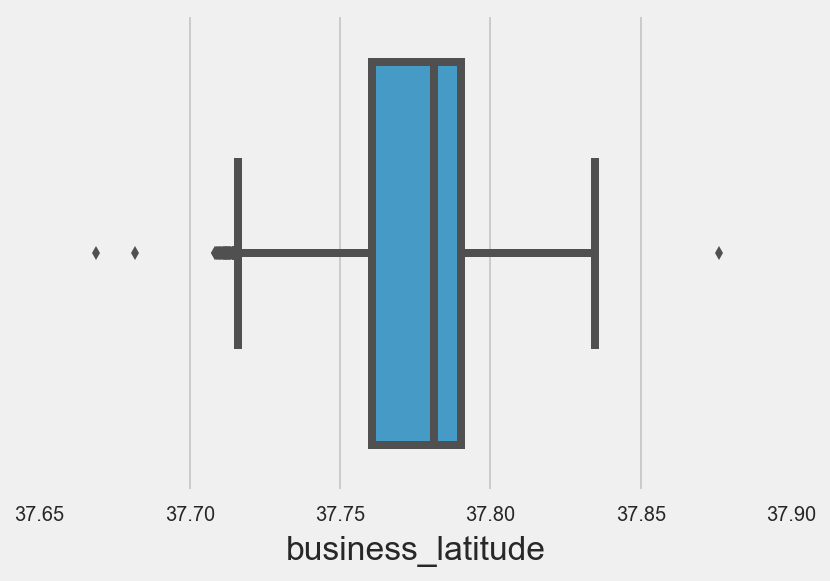

In [560]:
sns.boxplot(score_geo['business_latitude'])

## Remove outliers

In [787]:
score_geo[score_geo['business_latitude'] < 37.7]




,inspection_score_x,business_postal_code,business_latitude,business_longitude,business_category
1401,95.142857,94133.0,37.668824,-122.409411,10
2253,85.800000,94105.0,37.681741,-122.481424,1


In [788]:
score_geo.drop([1401, 2253], axis=0, inplace=True)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


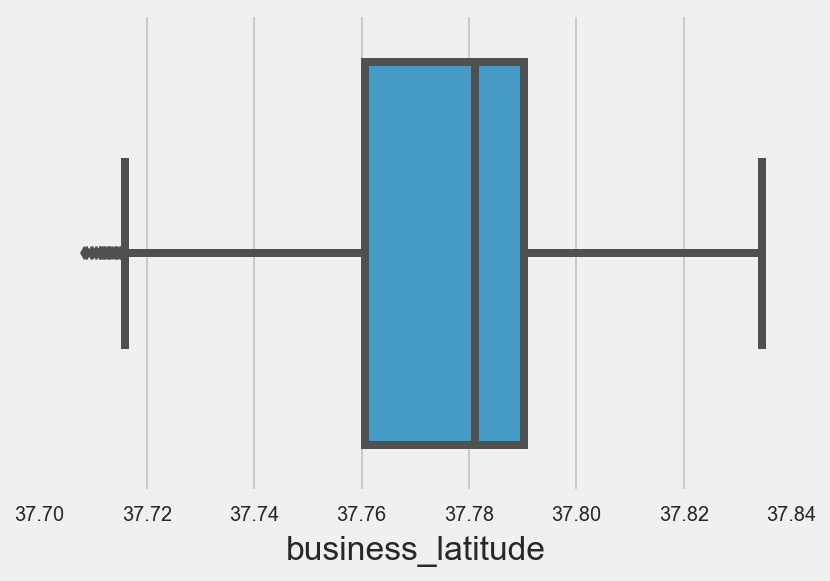

In [789]:
sns.boxplot(score_geo['business_latitude'])
#the new boxplot after removing outliers

# Construct a Linear Regression Model

In [797]:
score_geo_dummy.head()

,inspection_score_x,business_postal_code,business_latitude,business_longitude,business_category_1,business_category_2,business_category_3,business_category_4,business_category_5,business_category_6,business_category_7,business_category_8,business_category_9,business_category_10
0,87.400000,94104.0,37.791116,-122.403816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94.250000,94109.0,37.786848,-122.421547,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,96.666667,94104.0,37.792888,-122.403135,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,99.000000,94133.0,37.807155,-122.419004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,84.470588,94110.0,37.747114,-122.413641,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [798]:
target1 = score_geo_dummy['inspection_score_x'].values
predict1= score_geo_dummy.iloc[:,1:]

In [799]:
#perform train/test split
from sklearn.cross_validation import train_test_split

trainX, testX, trainY, testY = train_test_split(predict1, target1) 
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(2649, 13) (883, 13)
(2649,) (883,)


In [800]:
from sklearn.linear_model import LinearRegression
first_reg = LinearRegression()
first_reg.fit(trainX, trainY)
y_pred = first_reg.predict(testX)

In [803]:
from sklearn.metrics import mean_squared_error

print "Training: ", mean_squared_error(trainY, first_reg.predict(trainX)) ** .5
print "Testing: ", mean_squared_error(y_pred, testY) ** .5

 Training:  7.83769649341
Testing:  7.99299108974


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
- How would you measure the success of such a program?
- Rephrase this question to be unbiased
- Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data that Ferris used in class: 
- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?